In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd

url = "https://raw.githubusercontent.com/julia-sand/deep_pde_approx/main/Results/d1_case_plot_t1.csv"

data = pd.read_csv(url).T

df = pd.DataFrame(data)
df.reset_index(level=0, inplace=True)
df.columns = ["x","nn_approx","MC_approx","implicit_calc","finite_diffs"]

#starting points
x = df.iloc[:,0].values.astype(float)


In [ ]:
def black_scholes(S,K,r,c,sigma,T):
  denom = sigma * np.sqrt(T)
  d1_num = np.log(S/K) + (r - c + ((sigma**2)/2))*T
  d1 = d1_num /denom 
  d2_num = np.log(S/K) + (r - c - ((sigma**2)/2))*T
  d2 = d2_num / denom
  n1 = stats.norm.cdf(d1)
  n2 = stats.norm.cdf(d2)
  return (S*n1*np.exp(-c*T)) - (K * n2* np.exp(-r*T))
  
def phi(x):
  return np.exp(-r)*np.maximum(x-K,0)


In [ ]:
#parameters for BS formula
S = 90 #initial value
K = 100 #strike
T = 0.5 #ttm
r = 0.05 
c = 0.1 #div yield
sigma = 0.1 + 0.5

In [ ]:
#implicit solution calculation 
y_impl_bs_0 = [phi(i) for i in x]
y_impl_bs_1 = [black_scholes(i,K,r,c,sigma,0.25) for i in x]
y_impl_bs_2 = [black_scholes(i,K,r,c,sigma,0.5) for i in x]
y_impl_bs_3 = [black_scholes(i,K,r,c,sigma,0.75) for i in x]
y_impl_bs_4 = [black_scholes(i,K,r,c,sigma,1) for i in x]

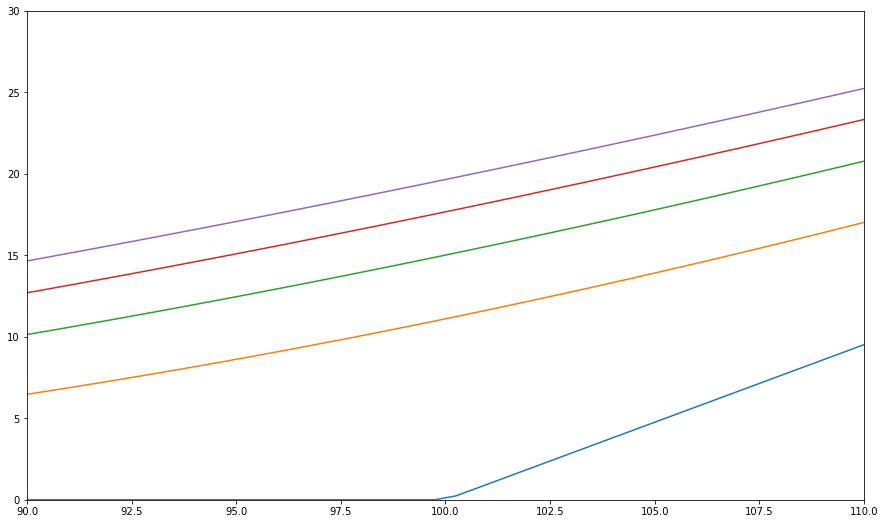

In [ ]:
Ts = [0,0.25,0.5,0.75,1]

fig = plt.figure(figsize=(15,9))
plt.plot(x,y_impl_bs_0)
plt.plot(x,y_impl_bs_1)
plt.plot(x,y_impl_bs_2)
plt.plot(x,y_impl_bs_3)
plt.plot(x,y_impl_bs_4)

ax = plt.gca()
ax.set_xlim(90,110)
ax.set_ylim(0,30)




plt.show()

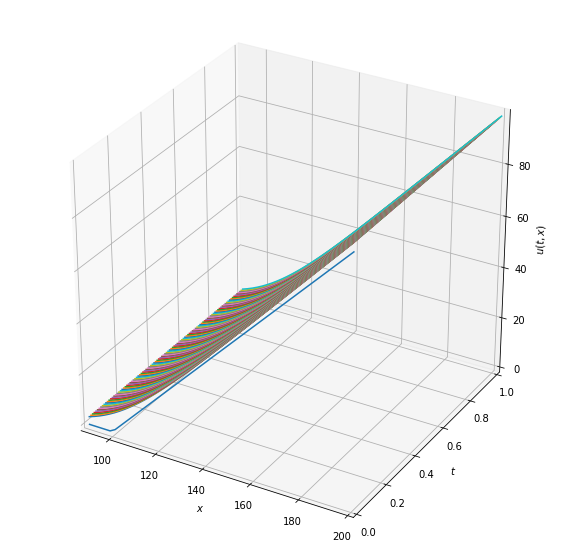

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(90,200)

x_len = len(x)

ts = np.linspace(0.0001,1,100)
y_impl_bs_0 = [phi(i) for i in x]

for t in ts: 
  y_ax_t = np.ones(x_len)*t 
  y_impl_bs_t = [black_scholes(i,K,r,c,sigma,0.1) for i in x]
  ax.plot(x,y_ax_t,y_impl_bs_t)

y_ax_0 = np.zeros(x_len)
y_impl_bs_0 = y_impl_bs_0 = [phi(i) for i in x]
ax.plot(x,y_ax_0,y_impl_bs_0)


ax.set_zlabel(r"$u(t,x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$t$")

ax.set_xlim(90,200)
ax.set_ylim(0,1)

plt.show()


In [ ]:
#finite differences calculation
nx = 40
nt = 100000
dt = 1/nt

T = 0.5

#initial condition 
u_start = black_scholes(x[0],K,r,c,sigma,T)
u_end = black_scholes(x[-1],K,r,c,sigma,T)

u = np.zeros(nx) 

sigma_sq = sigma**2

mu = r-c

u_0 = [np.exp(-r*T)*max(x - 100,0) for x in x]

for j in range(0,nt):
  for i in range(1,nx-1):
      x_curr = x[i]
      dx = x[i] - x[i-1]
      a_star =  0.5 * (sigma_sq*(x_curr**2) - dx*x_curr*mu)
      b_star = (dx**2)*(1/dt) - sigma_sq * (x_curr**2)
      c_star = 0.5 * (x_curr*mu*dx + (x_curr**2)*sigma_sq )

      u[i] = dt * (a_star * u_0[i-1] + b_star * u_0[i] + c_star * u_0[i+1]) / (dx**2)

  u[0] = u_start
  u[-1] = u_end

  u_0 = u

u

array([10.13188352, 10.39690579, 10.66234549, 10.92820091, 11.19447037,
       11.4611522 , 11.72824475, 11.99574639, 12.2636555 , 12.53197047,
       12.80068971, 13.06981165, 13.33933472, 13.60925738, 13.8795781 ,
       14.15029536, 14.42140765, 14.69291348, 14.96481139, 15.23709989,
       15.50977755, 15.78284291, 16.05629456, 16.33013109, 16.60435108,
       16.87895316, 17.15393594, 17.42929806, 17.70503817, 17.98115491,
       18.25764697, 18.53451302, 18.81175176, 19.08936188, 19.36734209,
       19.64569113, 19.92440772, 20.20349061, 20.48293855, 20.76275031])

In [ ]:
##mc hjb solution 
import numpy as np
import numpy.random as npr
import numpy.linalg as nlg

d=10
sigma = np.sqrt(2)
y_0 = np.zeros(10)
T = 1/3
mc_samples = 1000000

samples = 0
samples_sq = 0

for _ in range(0,mc_samples): 
  sample =  np.exp(- (nlg.norm(sigma*(np.sqrt(T))*npr.randn(d))**(0.5)))
  samples += sample
  samples_sq += sample ** 2

mean_samples = samples/mc_samples
mean_sq_samples = samples_sq/mc_samples
mean_samples_sq = mean_samples**2

sd_errs = 3*np.sqrt((mean_sq_samples - mean_samples_sq)/mc_samples)

#u(T,x)
print("u_ref = ", -np.log(mean_samples))

print("upper end = ", -np.log(mean_samples-sd_errs))
print("lower end = ", -np.log(mean_samples+sd_errs))

u_ref =  1.5602491456122494
upper end =  1.5608022178354364
lower end =  1.559696379108869
